In [1]:
import functions as fn  # Import functions written in functions.py
import os
import shutil
import pandas as pd
import h5py
import numpy as np
import numpy.ma as ma
import xarray as xr
import rasterio
import rioxarray
import geoviews as gv
from holoviews import opts
from pyproj import Transformer
import matplotlib.pyplot as plt
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
%matplotlib inline

## Open bare earth data, flatten, and convert to meters

In [2]:
src = rasterio.open('DOGAMI/dogami_out_32_utm_10.tiff')
# print("Number of bands:", src.count)
# print("Width:", src.width)
# print("Height:", src.height)
# print(src.bounds)
# print(src.crs)
# print(src.transform)

In [3]:
bare_earth_belknap = rioxarray.open_rasterio('DOGAMI/dogami_out_32_utm_10.tiff')
bare_earth_belknap /= 3.281
bare_earth_belknap = bare_earth_belknap.squeeze(dim="band")  #flatten
#bare_earth_belknap

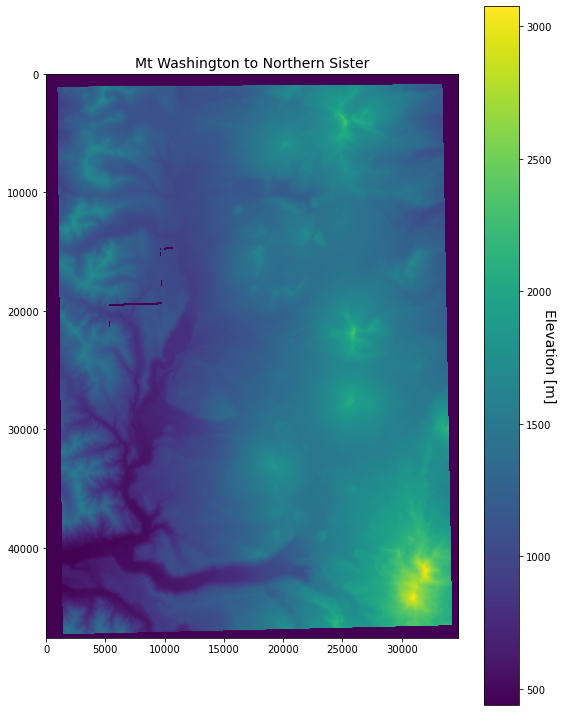

In [4]:
vmin = bare_earth_belknap.where(bare_earth_belknap.values > -1e20).min().values  # to ignore nodata values when plotting

plt.figure(figsize=(8, 10), tight_layout=True)
im = plt.imshow(bare_earth_belknap.values, vmin=vmin)  # minimum data value is around 440
plt.title("Mt Washington to Northern Sister", fontsize=14)
cbar = plt.colorbar(im)
cbar.set_label('Elevation [m]', rotation=270, fontsize=14)
#cbar.get_yaxis().labelpad = 20
plt.show()

In [5]:
bare_earth_belknap = ma.masked_array(src.read(1), mask=(src.read(1) < -3e+38))
bare_earth_belknap_m = bare_earth_belknap / 3.281

KeyboardInterrupt: 

In [ ]:
# Plot data
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(bare_earth_belknap_m)
ax.set_title("Mt Washington to Northern Sister", fontsize=14)
cbar = fig.colorbar(im, orientation='vertical')
cbar.ax.set_ylabel('Elevation [m]', rotation=270, fontsize=14)
cbar.ax.get_yaxis().labelpad = 20

## Import ICESat-2 Data

In [4]:
print(os.getcwd())

/Users/jsheppard/Documents/GitHub/snow_depth


In [5]:
os.chdir("./belknap_leaf_off")
print(os.getcwd())

/Users/jsheppard/Documents/GitHub/snow_depth/belknap_leaf_off


In [6]:
#sorted, and removes files that start with '.' (generally hidden files)
data = sorted((f for f in os.listdir() if not f.startswith(".")), key=str.lower)

beams = ["gt1r", "gt2r", "gt3r"]

#orientation 1: forward, strong on right
#orientation 0: backwards, strong on left
#right beams are gt1r, gt2r, gt3r. Left beams switch 'r' for 'l'

data_dict = fn.organize_data(data, beams)

gt1r in file processed_ATL03_20200818151728_08290802_005_01.h5 was placed into a DataArray
gt2r in file processed_ATL03_20200818151728_08290802_005_01.h5 was placed into a DataArray
gt3r in file processed_ATL03_20200818151728_08290802_005_01.h5 has no data
gt1r in file processed_ATL03_20200923015242_13700806_005_01.h5 was placed into a DataArray
gt2r in file processed_ATL03_20200923015242_13700806_005_01.h5 was placed into a DataArray
gt3r in file processed_ATL03_20200923015242_13700806_005_01.h5 was placed into a DataArray
gt1r in file processed_ATL03_20201019122113_03870902_005_01.h5 was placed into a DataArray
gt2r in file processed_ATL03_20201019122113_03870902_005_01.h5 was placed into a DataArray
gt3r in file processed_ATL03_20201019122113_03870902_005_01.h5 was placed into a DataArray


## Visualize RGTs on ROI map (not implemented yet)

In [ ]:
# # icepyx can already do this with visualize_elevation, but only for ATL06, 08, and a few of the other higher ones
# # make this a general function that creates a number of maps comparable to the number of 
# # RGTs in the dictionary created above, with all the correct ground tracks

# map_belknap_829 = (area_map 
#     * gv.Path([{'x': data_dict['829']['gt1r'].loc['lon'], 'y': data_dict['829']['gt1r'].loc['lat'], 
#                 'z': data_dict['829']['gt1r'].loc['h']}], ['x', 'y'], vdims='z').opts(color='z', cmap='Viridis', colorbar=True, line_width=5)
#     * gv.Path([{'x': data_dict['829']['gt2r'].loc['lon'], 'y': data_dict['829']['gt2r'].loc['lat'], 
#                 'z': data_dict['829']['gt2r'].loc['h']}], ['x', 'y'], vdims='z').opts(color='z', cmap='Viridis', colorbar=True, line_width=5)
# ).opts(opts.Overlay(title='RGT 829'))

# map_belknap_1370 = (area_map 
#     * gv.Path([{'x': data_dict['1370']['gt1r'].loc['lon'], 'y': data_dict['1370']['gt1r'].loc['lat'], 
#                 'z': data_dict['1370']['gt1r'].loc['h']}], ['x', 'y'], vdims='z').opts(color='z', cmap='Viridis', colorbar=True, line_width=5)
#     * gv.Path([{'x': data_dict['1370']['gt2r'].loc['lon'], 'y': data_dict['1370']['gt2r'].loc['lat'], 
#                 'z': data_dict['1370']['gt2r'].loc['h']}], ['x', 'y'], vdims='z').opts(color='z', cmap='Viridis', colorbar=True, line_width=5)
#     * gv.Path([{'x': data_dict['1370']['gt3r'].loc['lon'], 'y': data_dict['1370']['gt3r'].loc['lat'], 
#                 'z': data_dict['1370']['gt3r'].loc['h']}], ['x', 'y'], vdims='z').opts(color='z', cmap='Viridis', colorbar=True, line_width=5)
# ).opts(opts.Overlay(title='RGT 1370'))

# map_belknap_387 = (area_map 
#     * gv.Path([{'x': data_dict['387']['gt1r'].loc['lon'], 'y': data_dict['387']['gt1r'].loc['lat'], 
#                 'z': data_dict['387']['gt1r'].loc['h']}], ['x', 'y'], vdims='z').opts(color='z', cmap='Viridis', colorbar=True, line_width=5)
#     * gv.Path([{'x': data_dict['387']['gt2r'].loc['lon'], 'y': data_dict['387']['gt2r'].loc['lat'], 
#                 'z': data_dict['387']['gt2r'].loc['h']}], ['x', 'y'], vdims='z').opts(color='z', cmap='Viridis', colorbar=True, line_width=5)
#     * gv.Path([{'x': data_dict['387']['gt3r'].loc['lon'], 'y': data_dict['387']['gt3r'].loc['lat'], 
#                 'z': data_dict['387']['gt3r'].loc['h']}], ['x', 'y'], vdims='z').opts(color='z', cmap='Viridis', colorbar=True, line_width=5)
# ).opts(opts.Overlay(title='RGT 387'))

In [ ]:
# maps = map_belknap_829 + map_belknap_1370 + map_belknap_387
# #gv.save(maps, 'belknap_leaf_off_maps.png', fmt='png')
# maps

## Visualize RGT data

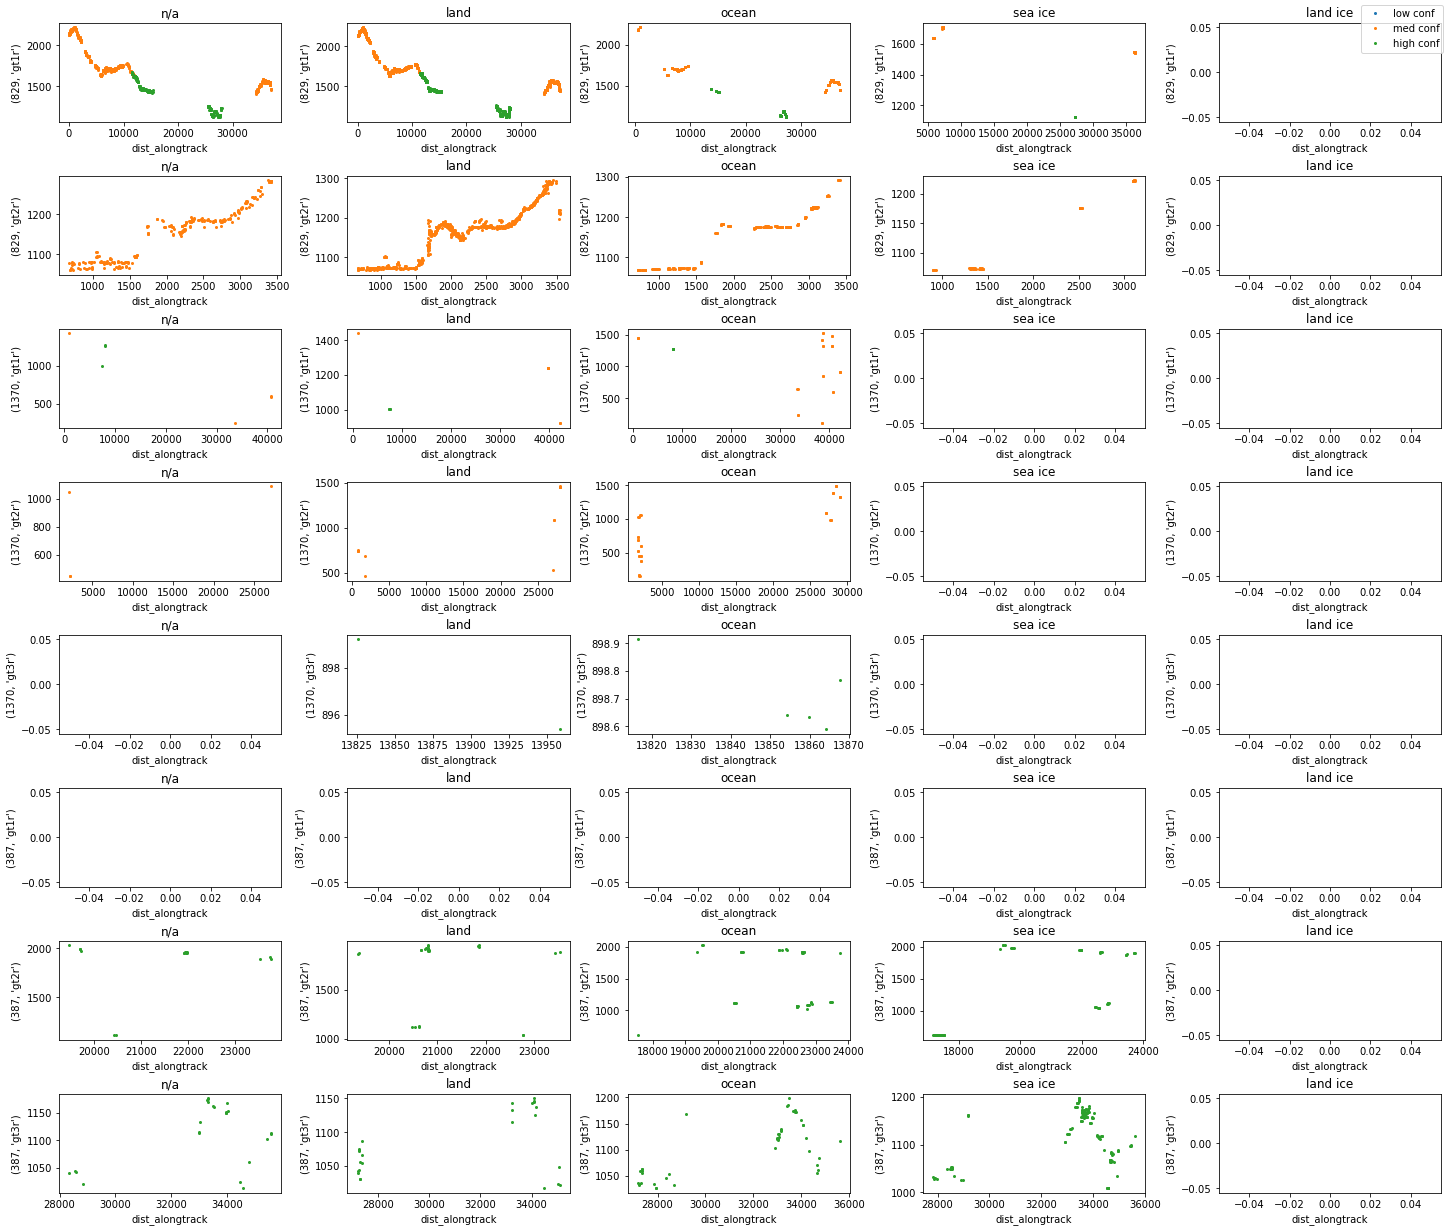

In [12]:
lf=[1,2,3,4,5]
fn.plot_beams(data_dict, confs=[2,3,4], dif=True, landforms=lf)

## Analyze ICESat elevation data compared to bare earth model (broken)

In [13]:
dif_values = []
dist_along_track = []
for ii in range(len(data_dict['829']['gt1r'].loc['h'])):
    l = bare_earth_belknap.sel(x=y, y=x, method='nearest').values
    if l < -1e20:
        continue
    elif data_dict['829']['gt1r'].loc['q4'][ii] == 0:  # compare only values that have high confidence for land
        x = data_dict['829']['gt1r'].loc['x'][ii]
        y = data_dict['829']['gt1r'].loc['y'][ii]
        h = data_dict['829']['gt1r'].loc['h'][ii]
        d = data_dict['829']['gt1r']['dist_alongtrack'][ii]
        dif_values.append(h - l)  #icesat height - bare earth height
        dist_along_track.append(d)

In [ ]:
def compare_heights(rgt, gt, ref_tif):
    dif_values = []
    dist_along_track = []
    for ii in range(len(data_dict[rgt][gt].loc['h'])):
        l = bare_earth_belknap.sel(x=y, y=x, method='nearest').values
        if l < -1e20:
            continue
        elif data_dict[rgt][gt].loc['q4'][ii] == 0:  # compare only values that have high confidence for land
            x = data_dict[rgt][gt].loc['x'][ii]
            y = data_dict[rgt][gt].loc['y'][ii]
            h = data_dict[rgt][gt].loc['h'][ii]
            d = data_dict[rgt][gt]['dist_alongtrack'][ii]
            dif_values.append(h - l)  #icesat height - bare earth height
            dist_along_track.append(d)
    return (dif_values, dist_along_track)

Text(0, 0.5, 'Elevation Dif [m]')

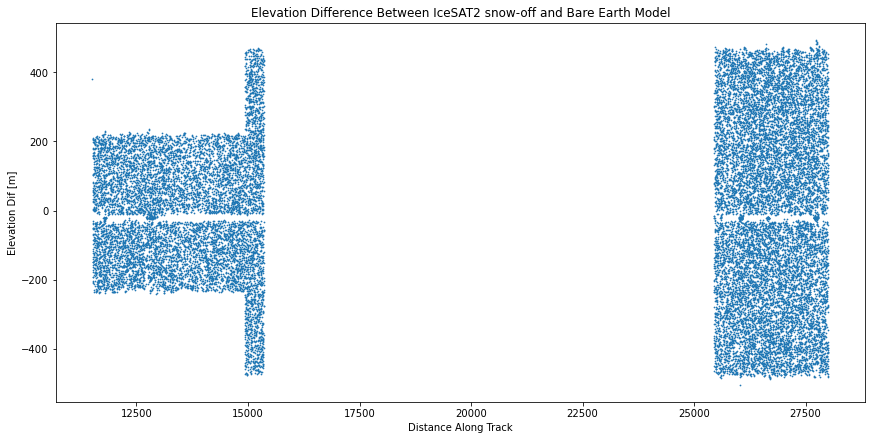

In [20]:
plt.figure(figsize=(12,6), constrained_layout=True)
plt.scatter(dist_along_track, dif_values, s=0.5)
plt.title("Elevation Difference Between IceSAT2 snow-off and Bare Earth Model")
plt.xlabel('Distance Along Track')
plt.ylabel('Elevation Dif [m]')

In [15]:
print('Mean: ', np.mean(dif_values))
print('Median: ', np.median(dif_values))
print('Standard Deviation: ', np.std(dif_values))

Mean:  -5.362070134969243
Median:  -0.9847412109375
Standard Deviation:  235.51665353794604
